In [1]:
# Loading the Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the Images

img1 = cv2.imread('./images/plate_1.jpg')
img2 = cv2.imread('./images/plate_2.jpg')

In [3]:
# Function to Display an Image

def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

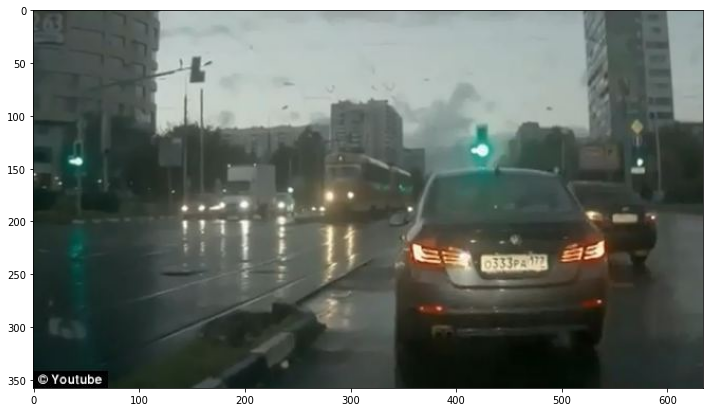

In [4]:
display(img1)

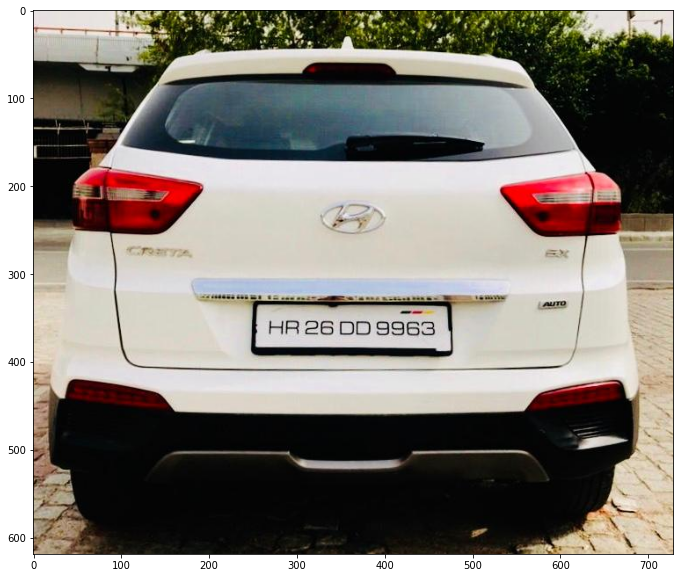

In [5]:
display(img2)

In [6]:
# Loading the HAAR-CASCADE

plate_cascade = cv2.CascadeClassifier('./haarcascade_russian_plate_number.xml')

In [7]:
# Function to Detect the Number Plate & Drawing a Rectangle Around it

def detect_plate(img):
    
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return plate_img

In [8]:
result1 = detect_plate(img1)
result2 = detect_plate(img2)

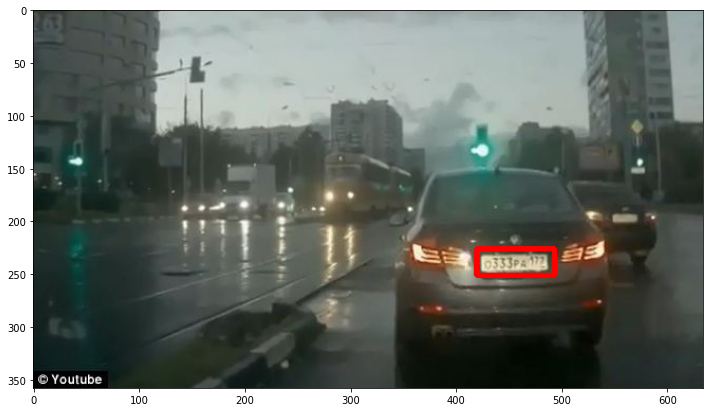

In [9]:
display(result1)

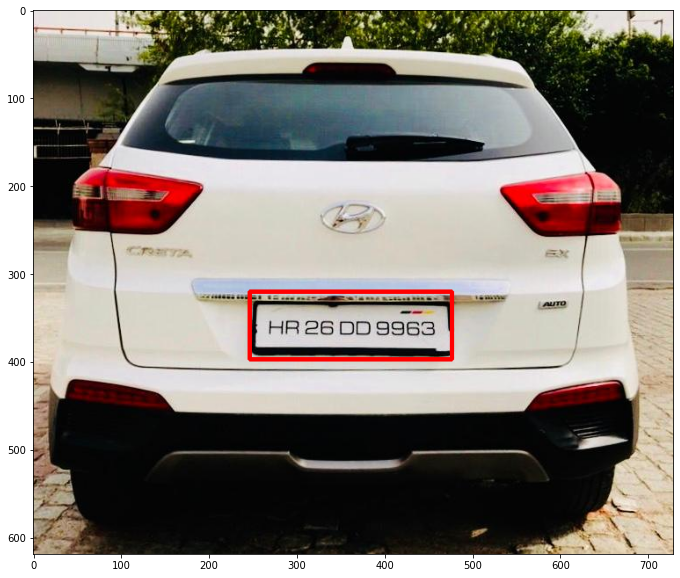

In [10]:
display(result2)

In [11]:
# Function to Detect and Blur

def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    blur = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in plate_rects: 
        blur = blur[y:y+h,x:x+w]
        blurred_img = cv2.medianBlur(blur, 15)
        
        plate_img[y:y+h,x:x+w] = blurred_img
    return plate_img

In [12]:
result1 = detect_and_blur_plate(img1)
result2 = detect_and_blur_plate(img2)

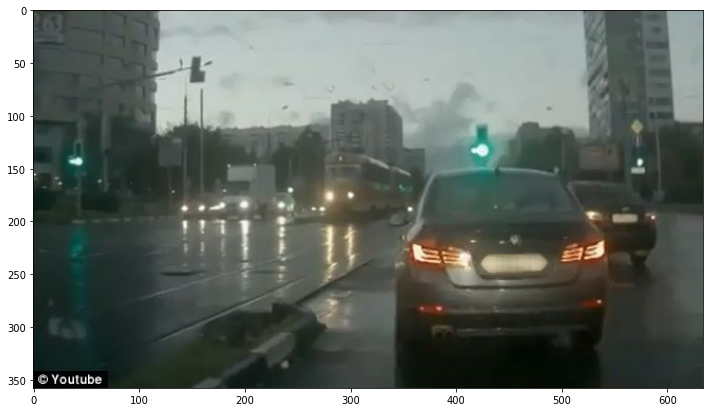

In [13]:
display(result1)

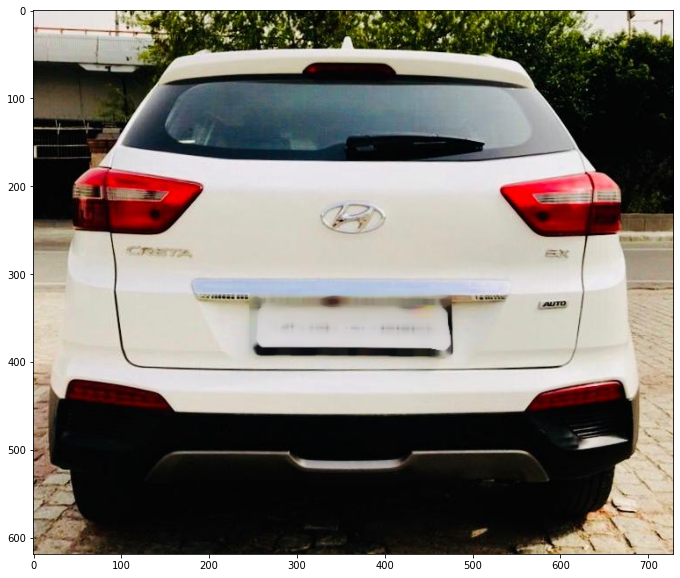

In [14]:
display(result2)